In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

In [2]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [3]:
class MyLinearRegression:
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases)
        self.w = torch.tensor([0.], requires_grad=True)
        self.b = torch.tensor([0.], requires_grad=True)
        
    def forward(self, x):
        # TODO: implement forward computation - compute predictions based on the inputs
        return self.w * x + self.b
    
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w, self.b]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    # TODO: implement the MSE loss function
    return (pred - y).pow(2).mean()

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype=np.float32)
torch_inputs = torch.from_numpy(numpy_inputs)
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

Testing model: an input of [0. 1. 2.] gives a prediction:
 tensor([0., 0., 0.], grad_fn=<AddBackward0>)


In [4]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        # TODO: Step 1 - create torch variables corresponding to features and labels
        inputs = torch.from_numpy(features)
        targets = torch.from_numpy(labels)

        # TODO: Step 2 - compute model predictions and loss
        outputs = model(inputs)
        loss = lossfunc(outputs, targets)
        
        # TODO: Step 3 - do a backward pass and a gradient update step
        optimizer.zero_grad()  
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(torch.from_numpy(x_train)).data.numpy()
    order = np.argsort(x_train, axis=0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 5.9467
Epoch [11/50], Loss: 1.1699
Epoch [21/50], Loss: 0.3857
Epoch [31/50], Loss: 0.2567
Epoch [41/50], Loss: 0.2352


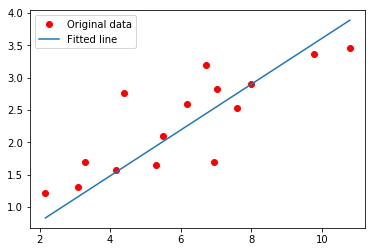

In [5]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 18.8053
Epoch [11/100], Loss: 3.4417
Epoch [21/100], Loss: 0.9192
Epoch [31/100], Loss: 0.5041
Epoch [41/100], Loss: 0.4349
Epoch [51/100], Loss: 0.4224
Epoch [61/100], Loss: 0.4193
Epoch [71/100], Loss: 0.4177
Epoch [81/100], Loss: 0.4164
Epoch [91/100], Loss: 0.4151


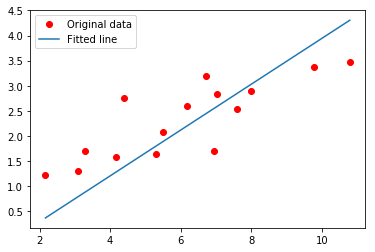

In [6]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        # TODO: implement forward computation
        return self.linear(x)
    
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = nn.MSELoss()

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=100)
visualize(x_train, y_train, model)

## MLP

Epoch [1/300], Loss: 2.2375
Epoch [11/300], Loss: 0.6505
Epoch [21/300], Loss: 0.4570
Epoch [31/300], Loss: 0.4099
Epoch [41/300], Loss: 0.2674
Epoch [51/300], Loss: 0.2199
Epoch [61/300], Loss: 0.1949
Epoch [71/300], Loss: 0.1842
Epoch [81/300], Loss: 0.1796
Epoch [91/300], Loss: 0.1787
Epoch [101/300], Loss: 0.1779
Epoch [111/300], Loss: 0.1771
Epoch [121/300], Loss: 0.1760
Epoch [131/300], Loss: 0.1740
Epoch [141/300], Loss: 0.1723
Epoch [151/300], Loss: 0.1704
Epoch [161/300], Loss: 0.1689
Epoch [171/300], Loss: 0.1678
Epoch [181/300], Loss: 0.1673
Epoch [191/300], Loss: 0.1670
Epoch [201/300], Loss: 0.1668
Epoch [211/300], Loss: 0.1667
Epoch [221/300], Loss: 0.1665
Epoch [231/300], Loss: 0.1664
Epoch [241/300], Loss: 0.1663
Epoch [251/300], Loss: 0.1662
Epoch [261/300], Loss: 0.1661
Epoch [271/300], Loss: 0.1661
Epoch [281/300], Loss: 0.1660
Epoch [291/300], Loss: 0.1659


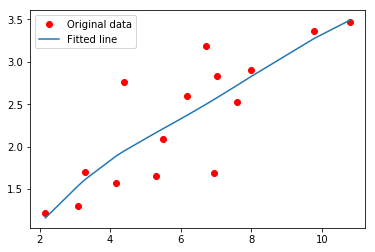

In [7]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        self.fc1 = nn.Linear(1, hidden_size)
        self.activation_fn = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, 1) 
    
    def forward(self, x):
        out = self.fc2(self.activation_fn(self.fc1(x)))
        return out
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 2
learning_rate = 1e-1

model = MLP(hidden_size=hidden_size)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=300)
visualize(x_train, y_train, model)